In [1]:
'''!pip install nltk
!pip install autocorrect
!pip install scikit-learn
!pip install pillow==9.5.0'''

'!pip install nltk\n!pip install autocorrect\n!pip install scikit-learn\n!pip install pillow==9.5.0'

# for Preprocessing NLP Data
- removing non alphabatic characters
- lowering the format
- tokeninzation
- remove stop words
- steming / lemitization
- spell correction


In [2]:
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
from autocorrect import Speller
spell=Speller()
from tqdm import tqdm
import re

C:\Users\nikhi\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\nikhi\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\nikhi\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
# Changing the working directory to my local location.
import os
os.getcwd()

'C:\\Users\\nikhi'

In [4]:
os.chdir(r'C:\Users\nikhi\Desktop\Nikhil\dev ashish')

In [5]:
data=pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [6]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [8]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
data.rename(columns={'v1':'labels','v2':'messages'},inplace=True)

In [10]:
data.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Lets Visualize the Spam words

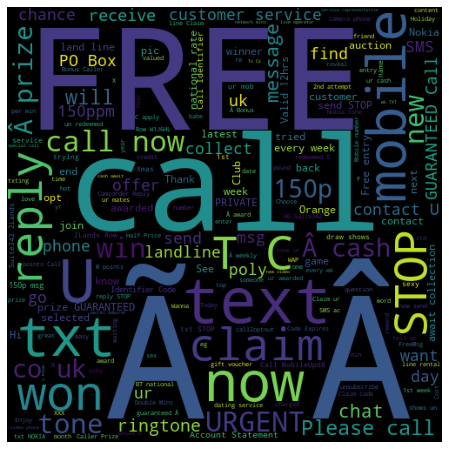

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

spam_words = ' '.join(list(data[data['labels']=='spam']['messages']))
spam_wc = WordCloud(width=500, height=500).generate(spam_words)

plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.axis('off')
plt.show()


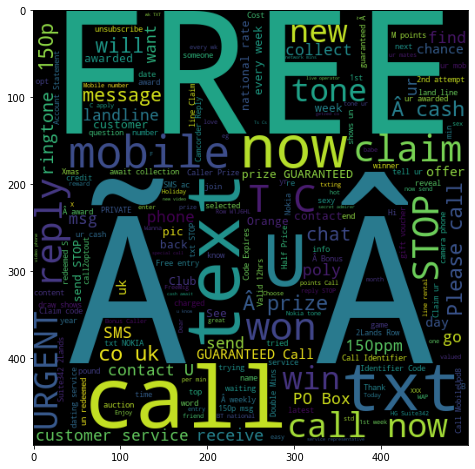

In [12]:
spam_words= ' '.join(list(data[data['labels']=='spam']['messages']))
spam_wc= WordCloud(width=500,height=500).generate(spam_words)
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.show()

# Lets Visualize the Ham words

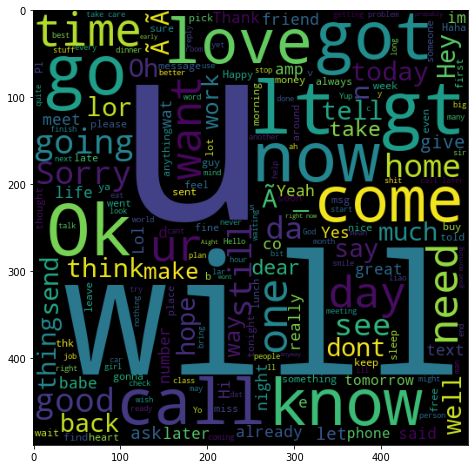

In [13]:
spam_words= ' '.join(list(data[data['labels']=='ham']['messages']))
spam_wc= WordCloud(width=500,height=500).generate(spam_words)
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.show()

# Preprocessing the Data

In [14]:
data.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
data.shape

(5572, 2)

In [16]:
# Encoding our Labels
data['labels']=data['labels'].apply(lambda x: 1 if x=='spam' else 0)

In [17]:
# preprocessing the Messages
new_data=[]

for i in tqdm(range(data.shape[0])):
    lines=data.iloc[i,1]
    # removing non alphabatic characters
    lines= re.sub('[^A-Za-z]',' ',lines)
    # lowering the every word
    lines=lines.lower()
    
    # tokenization
    tokenized_lines=word_tokenize(lines)
    
    # removing stop words ,stemming and spell correction
    processed_lines=[]
    for i in tokenized_lines:
        if i not in set(stopwords.words('english')):
            processed_lines.append(spell(stemmer.stem(i)))
            
    final_lines=' '.join(processed_lines)
    new_data.append(final_lines)
    
            
    

100%|██████████████████████████████████████████████████████████████████████████████| 5572/5572 [04:23<00:00, 21.15it/s]


In [18]:
new_data

['go during point crazy avail bugs n great world la e buffet cine got amor wat',
 'ok lar joke if u oni',
 'free entry wki comp win fa cup final tt st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf live around though',
 'frees hey dark week word back like fun still tb ok xxx std chg send rev',
 'even brother like speak treat like aid patent',
 'per request well well oru minnaminungint nurungu vietnam set callertun caller press copy friend callertun',
 'winner value network custom select received prize reward claim call claim code kl valid hour',
 'mobil month u r entity update latest colour mobil camera free call mobil update co free',
 'gon na home soon want talk stuff anymore tonight k cri enough today',
 'six chance win cash pound txt cs send cost p day day stand apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www duk net lccltd box link rw',
 'search right word thank breathe pro

In [19]:
len(new_data)

5572

In [20]:
Y=data['labels']
Y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: labels, Length: 5572, dtype: int64

In [21]:
Y.value_counts()

labels
0    4825
1     747
Name: count, dtype: int64

# splitting the data into training and testing

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(new_data,Y,test_size=0.25)

In [23]:
X_train

['',
 'want new nokia colour phone deliveredtomorrow free minut mobil free text free accord reply call',
 'call',
 'shall fine avatar hollalat',
 'gd got free ice cream oso wan',
 'fantasy football back tv go sky gamestar sky active play k dream team score start saturday relist sky opt',
 'get hep b immune nigeria',
 'email ying part red get fr',
 'fuck babe miss already know let send money toward net need want grave',
 'ok ok ok what ur today plan',
 'yeah go bed back midnight',
 'helloooo wake sweet more welcome enjoy day full joy gun ming',
 'how person story',
 'honeymoon outfit',
 'hear new divorce barb come ken stuff',
 'u deficit need model e human di sem init u wan take model st',
 'want get laid tonight want real dog local sent direct ur mob join uk largest dog network bt texting gravel nt ec p msg p',
 'ok',
 'chang window logo sound',
 'nova tell noe home da aft wat',
 'hello r u im bore ine thought id get bore tv tell some exit happen any',
 'well obvious people cool colleg

In [24]:
X_test

['think go finn come',
 'delhi chennai still silent',
 'u r winner u ave special select receive cash holiday flight inc speak live oper claim p min',
 'de look good',
 'r u meet da ge site tmr',
 'true passable get high score apply phd get year salary make life easier',
 'sunshine quiz wki q win top song dvd player u know country liverpool play mid week txt ans sp tron',
 'good let thank god pleas complete drug lot water beauty day',
 'go lunch if family aft dat go str orchard lor',
 'come get b quit diff guess rite',
 'stupid auto correct phone',
 'one stalk profil',
 'time come tomorrow',
 'keep away like',
 'erm ill pick pm give enough time get park',
 'jun go google n search set',
 'convey regard',
 'win year supply cd store ur choice worth enter weekly draw txt music ts cs www dew com sub win ppm',
 'dude im longer disc im aquarium',
 'next month get upto call ur standard network charg active call c wire net st term box uz cost min mobcudb',
 'ever one foot',
 'hey go lo lesson gy

In [25]:
Y_train

252     0
3407    1
3767    0
922     0
5403    0
       ..
1230    0
2066    0
2396    0
5083    0
1863    0
Name: labels, Length: 4179, dtype: int64

In [26]:
Y_test

1734    0
1975    0
4821    1
2667    0
2665    0
       ..
4746    0
5236    0
4109    0
5285    1
577     0
Name: labels, Length: 1393, dtype: int64

# Vectorization using Bag of Words

In [27]:
from sklearn.feature_extraction.text import CountVectorizer  #tf_idf
matrix=CountVectorizer()

In [28]:
X_train_vect=matrix.fit_transform(X_train).toarray()
X_test_vect=matrix.transform(X_test).toarray()

In [29]:
X_train_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [30]:
X_test_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [31]:
Y_train

252     0
3407    1
3767    0
922     0
5403    0
       ..
1230    0
2066    0
2396    0
5083    0
1863    0
Name: labels, Length: 4179, dtype: int64

In [32]:
Y_test

1734    0
1975    0
4821    1
2667    0
2665    0
       ..
4746    0
5236    0
4109    0
5285    1
577     0
Name: labels, Length: 1393, dtype: int64

# Lets train our Model - Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [34]:
model.fit(X_train_vect,Y_train)

GaussianNB()

In [35]:
model.classes_

array([0, 1], dtype=int64)

In [36]:
Y_pred=model.predict(X_test_vect)

In [37]:
Y_pred

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [39]:
accuracy_score(Y_test,Y_pred) * 100

85.57071069633884

In [40]:
confusion_matrix(Y_test,Y_pred)

array([[1044,  172],
       [  29,  148]], dtype=int64)